In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.9.1


In [2]:
# module
fashion_mnist = tf.keras.datasets.fashion_mnist

In [7]:
# load_data를 해야 받아옴, tuple형으로 받아주기
# fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [10]:
len(fashion_mnist.load_data()) # 2개로 나온다는 것은 2개의 단위 (),()

2

In [11]:
len(fashion_mnist.load_data()[0]) # 여기 안에도 2개가 있음

2

In [14]:
# (a0,a1),(b0,b1) = fashion_mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [12]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [17]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
# y값의 분포도
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))


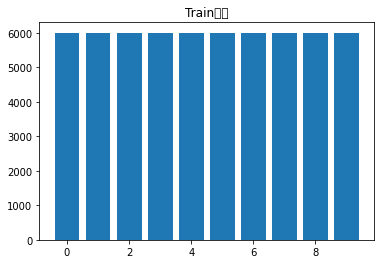

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
      dtype=int64))


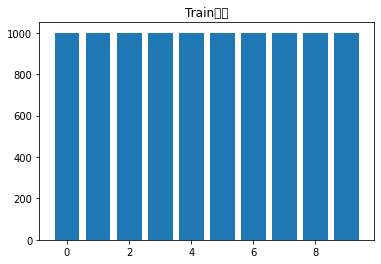

In [28]:
import matplotlib.pyplot as plt

def countF(data, title):
    tmp = np.unique(data, return_counts=True)
    print(tmp)
    plt.bar(tmp[0],tmp[1])
    plt.title(title)
    plt.show()

countF(train_labels, 'Train자료')
countF(test_labels, 'Train자료')

In [41]:
def rangeChk(image):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.colorbar()
    plt.grid(False)
    plt.show()

# 이미지 숫자값의 범위를 확인하는 방법

In [36]:
train_images.shape

(60000, 28, 28)

In [37]:
# 0~1값으로 조정

train_images = train_images / 255.0

test_images = test_images / 255.0

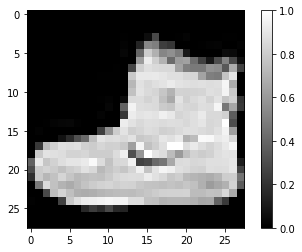

In [42]:
rangeChk(train_images[0])

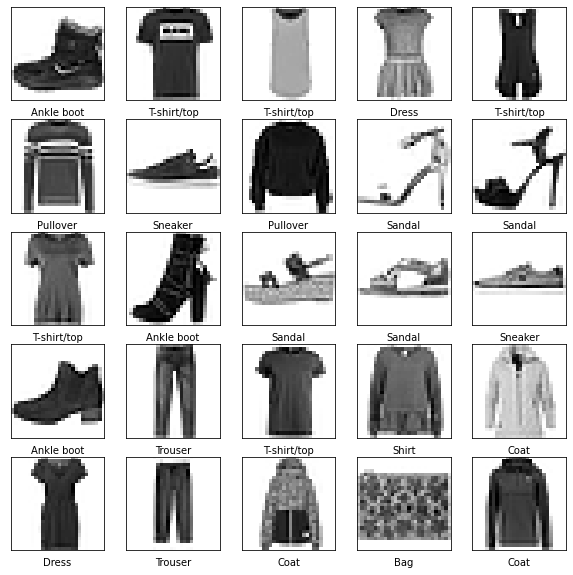

In [43]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

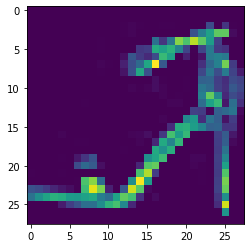

In [49]:
train_images[np.where(train_labels==5)]

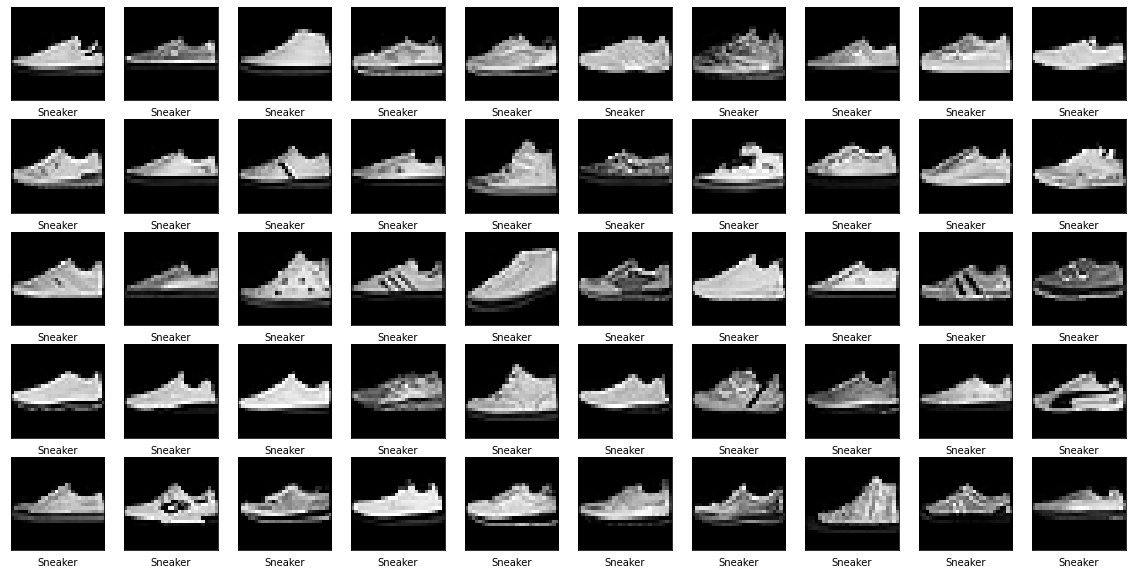

In [216]:
# 결과값이 튜플이므로 0번째가 인덱스의 ndarray
findRow = np.where(train_labels==7)

plt.figure(figsize=(20,10))
for cnt,i in enumerate(findRow[0][:50]):
    plt.subplot(5,10,cnt+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [66]:
print(class_names)
class_names.index('Bag')

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


8

In [95]:
epoch = 20

## 사이즈별 오버피팅 확인법

In [98]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 784+1
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10)
])

# softmax지정 안 하면 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# model predict시 또 sequential에 softmax추가해야 하므로
# 마지막 Dense에 activation='softmax'추가하기
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# validation_data추가해서 test검증, 따로 evaluate안해도 됨
hist = model.fit(train_images, train_labels, 
                 epochs=epoch, validation_data=(test_images, test_labels), 
                 verbose=1, batch_size=200)

Epoch 1/20
300/300 [==============================] - 6s 18ms/step - loss: 0.8435 - accuracy: 0.8212 - val_loss: 0.6584 - val_accuracy: 0.8407
Epoch 2/20
300/300 [==============================] - 5s 17ms/step - loss: 0.5469 - accuracy: 0.8639 - val_loss: 0.5183 - val_accuracy: 0.8623
Epoch 3/20
300/300 [==============================] - 5s 16ms/step - loss: 0.4702 - accuracy: 0.8710 - val_loss: 0.4746 - val_accuracy: 0.8640
Epoch 4/20
300/300 [==============================] - 5s 17ms/step - loss: 0.4262 - accuracy: 0.8771 - val_loss: 0.4594 - val_accuracy: 0.8612
Epoch 5/20
300/300 [==============================] - 4s 15ms/step - loss: 0.3992 - accuracy: 0.8817 - val_loss: 0.4388 - val_accuracy: 0.8669
Epoch 6/20
300/300 [==============================] - 5s 17ms/step - loss: 0.3794 - accuracy: 0.8866 - val_loss: 0.4305 - val_accuracy: 0.8697
Epoch 7/20
300/300 [==============================] - 6s 19ms/step - loss: 0.3668 - accuracy: 0.8889 - val_loss: 0.4058 - val_accuracy: 0.8715

In [87]:
small_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 784+1
    tf.keras.layers.Dense(16, activation='relu'),
    #tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10)
])

# softmax지정 안 하면 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# SparseCategoricalCrossentropy는 y값을 원핫인코딩 안 하고 softmax를 하고자 할 때 사용
small_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# validation_data추가해서 test검증, 따로 evaluate안해도 됨
small_hist = small_model.fit(train_images, train_labels, epochs=epoch, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5947 - accuracy: 0.7924 - val_loss: 0.4793 - val_accuracy: 0.8332
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4314 - accuracy: 0.8485 - val_loss: 0.4811 - val_accuracy: 0.8258
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4023 - accuracy: 0.8580 - val_loss: 0.4301 - val_accuracy: 0.8471
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3852 - accuracy: 0.8624 - val_loss: 0.4221 - val_accuracy: 0.8536
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3731 - accuracy: 0.8671 - val_loss: 0.4030 - val_accuracy: 0.8559
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3620 - accuracy: 0.8710 - val_loss: 0.4217 - val_accuracy: 0.8484
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3541 - accuracy: 0.8733 - val_loss: 0.4081 - val_accuracy:

In [88]:
big_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # 784+1
    tf.keras.layers.Dense(512, activation='relu'),
    #tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(10)
])

# softmax지정 안 하면 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# SparseCategoricalCrossentropy는 y값을 원핫인코딩 안 하고 softmax를 하고자 할 때 사용
big_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# validation_data추가해서 test검증, 따로 evaluate안해도 됨
big_hist = big_model.fit(train_images, train_labels, epochs=epoch, validation_data=(test_images, test_labels), verbose=2)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4762 - accuracy: 0.8291 - val_loss: 0.4401 - val_accuracy: 0.8424
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3604 - accuracy: 0.8677 - val_loss: 0.4088 - val_accuracy: 0.8496
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3223 - accuracy: 0.8800 - val_loss: 0.3543 - val_accuracy: 0.8708
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2983 - accuracy: 0.8888 - val_loss: 0.3454 - val_accuracy: 0.8741
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2804 - accuracy: 0.8956 - val_loss: 0.3528 - val_accuracy: 0.8743
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2664 - accuracy: 0.9003 - val_loss: 0.3404 - val_accuracy: 0.8758
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2529 - accuracy: 0.9049 - val_loss: 0.3537 - val_accuracy:

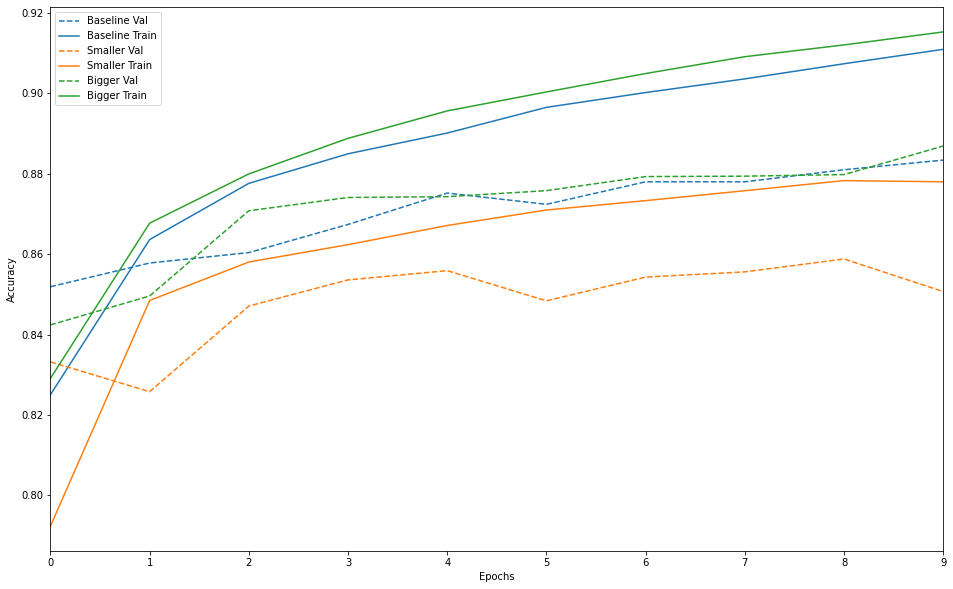

In [94]:
def plot_history(histories, key='mse'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline',hist),
              ('smaller', small_hist),
              ('bigger', big_hist)], 'accuracy')

In [99]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4271 - accuracy: 0.8702 - 1s/epoch - 4ms/step

Test accuracy: 0.870199978351593


In [100]:
# 검증 test 데이터 (activation=softmax으로 지정을 안 했기 때문에 다시 쌓아줘야 함)

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [101]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [102]:
predictions[0]

array([6.0064842e-05, 4.1888193e-06, 6.0185225e-06, 1.4518396e-06,
       9.7822965e-07, 3.4343519e-03, 9.6522126e-06, 1.0532951e-02,
       1.1418035e-05, 9.8593891e-01], dtype=float32)

In [103]:
np.argmax(predictions[0])

9

In [104]:
# 일치함
test_labels[0]

9

('Pullover', 'Pullover')

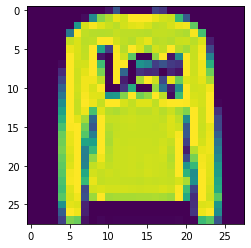

In [109]:
num = 1
plt.imshow(test_images[num])
class_names[np.argmax(predictions[num])], class_names[test_labels[num]]

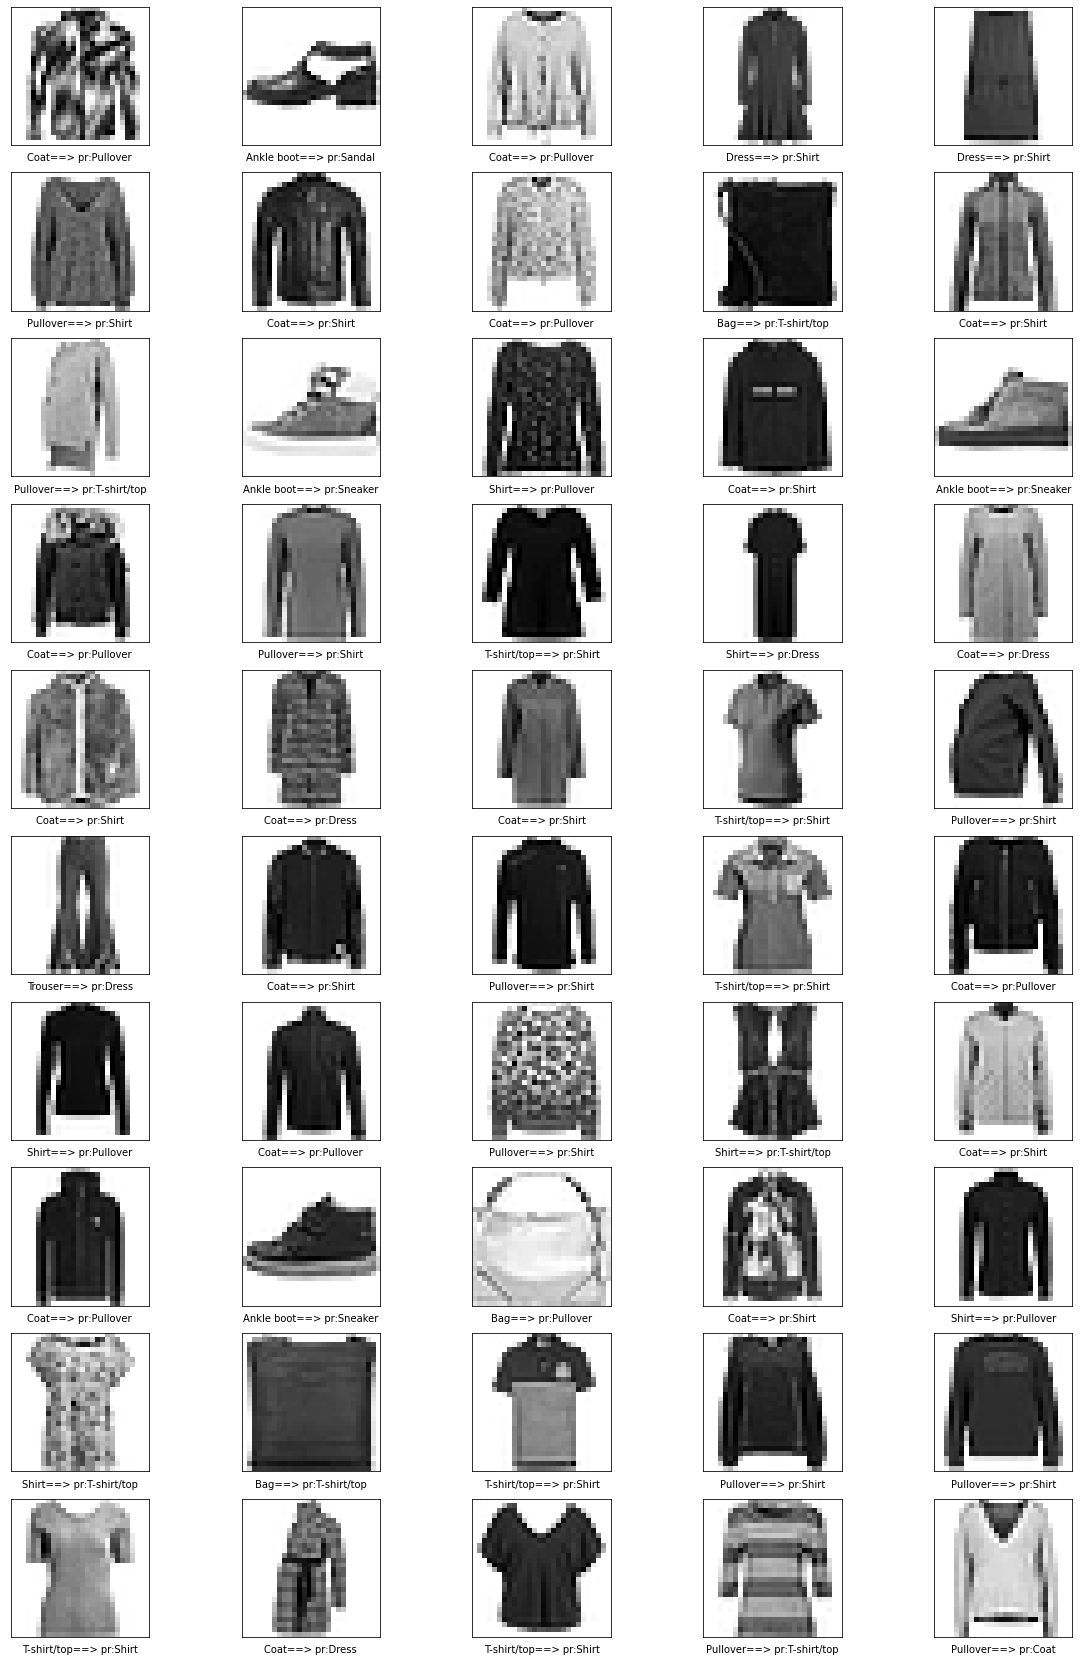

In [126]:
test_labels
result = [np.argmax(x) for x in predictions]

import pandas as pd
df = pd.DataFrame({'test':test_labels,'result':result, 'bigo':test_labels==result})
findRow = df[df['bigo']==False].index

plt.figure(figsize=(20,30))
for cnt,i in enumerate(findRow[:50]):
    plt.subplot(10,5,cnt+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    # 원래 라벨 ==> 예측값
    plt.xlabel(class_names[test_labels[i]]+'==> pr:'+class_names[df.iloc[i,1]])
plt.show()

0 class error List
(array([1, 2, 3, 4, 6, 8], dtype=int64), array([  1,   9,  15,   1, 109,   6], dtype=int64))


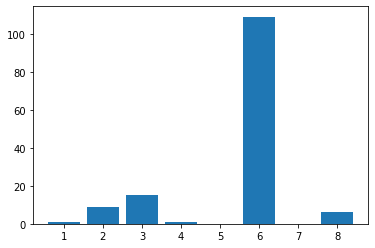

1 class error List
(array([0, 3, 4, 6], dtype=int64), array([11, 21,  3,  5], dtype=int64))


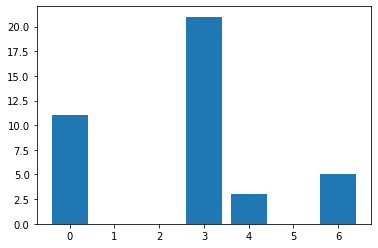

2 class error List
(array([0, 1, 3, 4, 6], dtype=int64), array([ 14,   1,  15,  50, 127], dtype=int64))


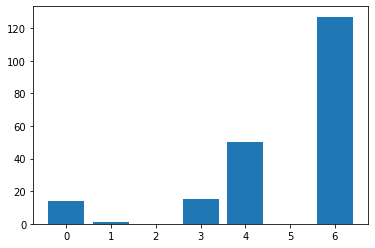

3 class error List
(array([0, 1, 2, 4, 5, 6, 8], dtype=int64), array([30,  1,  8,  6,  1, 29,  4], dtype=int64))


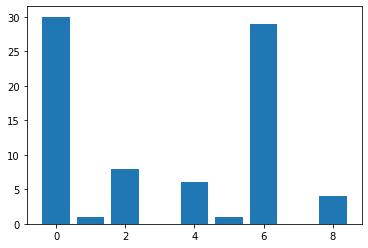

4 class error List
(array([0, 1, 2, 3, 6], dtype=int64), array([  1,   1, 119,  60, 192], dtype=int64))


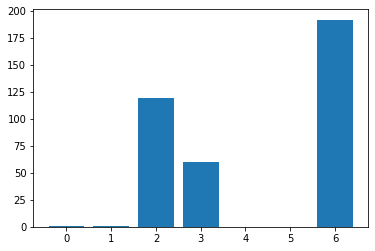

5 class error List
(array([7, 8, 9], dtype=int64), array([20,  1, 13], dtype=int64))


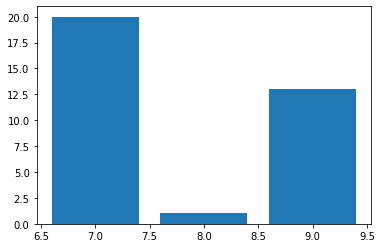

6 class error List
(array([0, 2, 3, 4, 8], dtype=int64), array([150,  73,  28,  27,   3], dtype=int64))


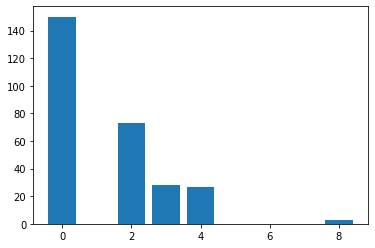

7 class error List
(array([5, 9], dtype=int64), array([22, 25], dtype=int64))


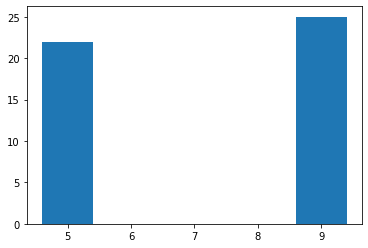

8 class error List
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64), array([10,  1,  4,  6,  3,  8, 20,  6], dtype=int64))


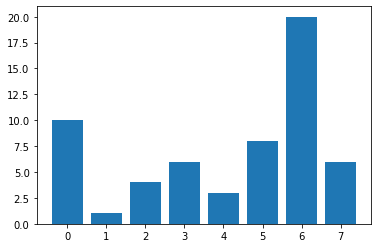

9 class error List
(array([0, 3, 5, 7], dtype=int64), array([ 1,  1,  8, 28], dtype=int64))


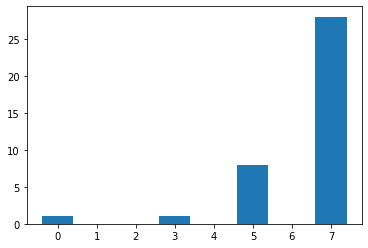

In [136]:
# 어떤 레이블을 제일 못 맞췄는지, 어떤 레이블로 예측했는지

test_labels
result = [np.argmax(x) for x in predictions]

import pandas as pd
df = pd.DataFrame({'test':test_labels,'result':result, 'bigo':test_labels==result})
findRow = df[df['bigo']==False].index

# False들만
errDf = df.iloc[findRow,:]

for x in range(10):
    print(str(x) + ' class error List')
    #display(errDf[errDf['test']==x])
    tmp = errDf[errDf['test']==x]
    tmpU = np.unique(tmp['result'],return_counts=True)
    print(tmpU)
    # 몇번라벨, 카운트수
    plt.bar(tmpU[0], tmpU[1])
    plt.show()


In [141]:
# 예측이 틀린 실제값
print(np.unique(df['test'][df['bigo']==False],return_counts=True))

# 예측이 틀린 예측값
print(np.unique(df['result'][df['bigo']==False],return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([141,  40, 207,  79, 373,  34, 281,  47,  58,  38], dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64), array([217,   5, 213, 146,  90,  39, 482,  54,  14,  38], dtype=int64))


category: Sandal 상품을 중고나라에 올리셨습니다.


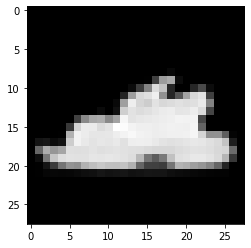

In [153]:
from PIL import Image

# 컬러
#img = Image.open('sandal_test.jpg')
# 흑백
img = Image.open('sandal_test.jpg').convert('L')
img = img.resize((28,28))
img

img = np.array(img)

# 색상 반전
imgback = 255-img
plt.imshow(imgback, cmap='gray')
#np.shape(img), np.shape(img1)

# 잘 맞췄음
# np.shape(imgback) # (28,28) -> (1,28,28) reshape
class_names[np.argmax(probability_model(imgback.reshape(1,28,28)))]

# 0~1값으로 스케일링 후 다시 모델
primg = imgback/255.
reimg = np.reshape(primg, (1,28,28))

ca = class_names[np.argmax(probability_model(reimg))]
print('category:', ca, '상품을 중고나라에 올리셨습니다.')


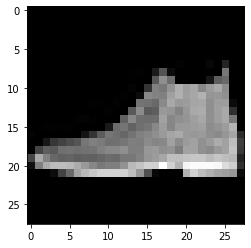

In [145]:
# 배경은 전부 검정색
plt.imshow(test_images[0],cmap='gray')

In [ ]:
## 미션 패션 mnist 모델에서 예측한 결과로 폴더 이동

# class_name별 폴더를 제작

## img 폴더 안에 사진을 여러개 넣음
## 예측결과를 높이고 싶다면 모델 학습에 사용되었던 사진과 비슷한 사진으로 작업
## 전체적인 걸 원한다면 어떤 사진이든 괜찮

## img 폴더에서 사진 읽고 그 사진을 예측
## 모델학습과 똑같은 상황을 만들어야 됨.
## 이동하든 복사하든 폴더로 이동

## 미션
## 각 폴더별 데이터 갯수를 차트로

In [218]:
import os
from glob import glob

path = "./mnist"
os.mkdir(path)

class_names = [x.replace("/","") for x in class_names]

for name in class_names:
    path1 = path + "/" + name
    os.mkdir(path1)

In [217]:
# 사진들 사전작업
# sandal ,sneaker좌우반전
sandals = glob("./img/sandal*")

num = 0
for sandal in sandals:
    img = Image.open(sandal)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img.save('./img/sandal ' + str(num)+ '.jpg',"JPEG")
    num += 1
    
sneakers = glob("./img/sneaker*")

num = 0
for sneaker in sneakers:
    img = Image.open(sneaker)
    img = img.transpose(Image.FLIP_LEFT_RIGHT)
    img.save('./img/sneaker ' + str(num)+ '.jpg',"JPEG")
    num += 1

C:\Users\jhpol\AppData\Local\Temp\ipykernel_9468\4262663685.py:17: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  img = img.transpose(Image.FLIP_LEFT_RIGHT)


In [219]:
# 사진 불러오기

ca_list = []
com_path = './mnist/'
imgs = glob("./img/*")

num = 0

for ori_img in imgs:
    # 저장할 원본 이미지
    img_origin = Image.open(ori_img)
    
    # 작업
    img_copy = Image.open(ori_img).convert('L')
    img_resize = img_copy.resize((28,28))

    img = np.array(img_resize)

    imgback = 255-img
    primg = imgback/255.
    reimg = np.reshape(primg, (1,28,28))

    ca = class_names[np.argmax(probability_model(reimg))]
    #print("예측값 : " + ca)
    ca_list.append(ca)

    img_origin.save(com_path+ca.replace("/","")+"/" + ca + "#" + str(num) + ".jpg", "JPEG")

    num += 1

# image1.transpose(Image.FL) 이미지 좌우반전

In [220]:
result_files = glob("./mnist/*/*")

class_dict = {}

for re_file in result_files:
    file_name = re_file.split("\\")[2]
    class_name = file_name.split("#")[0]
    
    if class_name in class_dict:
        count = class_dict[class_name]
        count += 1
        class_dict[class_name] = count
    else:
        class_dict[class_name] = 1
    
class_dict['T-shirt/top'] = class_dict.pop('T-shirttop')

class_dict

{'Ankle boot': 6,
 'Bag': 10,
 'Coat': 3,
 'Dress': 3,
 'Pullover': 3,
 'Sandal': 8,
 'Shirt': 6,
 'Trouser': 2,
 'T-shirt/top': 5}

<BarContainer object of 9 artists>

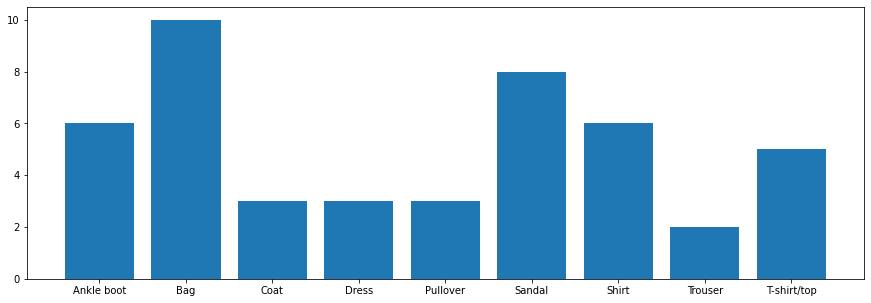

In [221]:
plt.figure(figsize=(15,5))
plt.bar(class_dict.keys(), class_dict.values())